# MNIST  
`pip install ipywidgets`

In [8]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)


print(len(trainset.train_data))
print(trainset.train_data.numpy().shape)
print(trainset.train_labels.numpy().shape)
print(trainset.train_labels.numpy())
print(testset.test_data.numpy().shape)


60000
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


c:\Users\Student\anaconda3\envs\AI_course\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\Users\Student\anaconda3\envs\AI_course\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


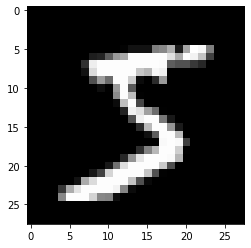

In [9]:
import matplotlib.pyplot as plt

plt.imshow(trainset.train_data[0].numpy(),cmap='gray')

In [10]:
for images, labels in train_data:
    print(images.shape)
    print(labels.shape)
    print(images)
    print(labels)

    break

torch.Size([64, 784])
torch.Size([64])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([4, 5, 0, 8, 0, 7, 4, 7, 8, 0, 7, 5, 3, 4, 2, 6, 3, 0, 6, 8, 5, 7, 5, 3,
        8, 9, 9, 1, 8, 6, 9, 8, 1, 1, 5, 3, 5, 0, 1, 1, 5, 5, 9, 8, 9, 6, 1, 3,
        7, 8, 0, 2, 4, 0, 6, 8, 0, 3, 0, 1, 9, 1, 7, 2])


# Build DNN Model(Functional API)

In [11]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__() # copy父類別的初始化函數
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)  # (cuda)搬到gpu
print(model)

for param in model.parameters():
    print(type(param.data), param.size())
    
param_list = list(model.parameters())
print(param_list[0].shape)
print(param_list[1].shape)
print(param_list[2].shape)
print(param_list[0])

Using cpu device
DNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=125, bias=True)
  (fc4): Linear(in_features=125, out_features=10, bias=True)
)
<class 'torch.Tensor'> torch.Size([500, 784])
<class 'torch.Tensor'> torch.Size([500])
<class 'torch.Tensor'> torch.Size([250, 500])
<class 'torch.Tensor'> torch.Size([250])
<class 'torch.Tensor'> torch.Size([125, 250])
<class 'torch.Tensor'> torch.Size([125])
<class 'torch.Tensor'> torch.Size([10, 125])
<class 'torch.Tensor'> torch.Size([10])
torch.Size([500, 784])
torch.Size([500])
torch.Size([250, 500])
Parameter containing:
tensor([[-0.0085,  0.0009, -0.0146,  ..., -0.0120, -0.0346, -0.0272],
        [-0.0277,  0.0083,  0.0232,  ..., -0.0289, -0.0001, -0.0325],
        [-0.0341,  0.0300, -0.0349,  ...,  0.0079, -0.0115,  0.0010],
        ...,
        [ 0.0177, -0.0335,  0.0167,  ..., -0.0242,  0.0011,  0.0193],
    

# Build DNN Model(Sequential API)

In [12]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import OrderedDict
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        
        self.seq = nn.Sequential(
                   nn.Linear(28*28, 500),
                   nn.ReLU(),
                   nn.Linear(500, 250),
                   nn.ReLU(),
                   nn.Linear(250, 125),
                   nn.ReLU(),
                   nn.Linear(125, 10)
                   )
        
        
        '''
        self.seq = nn.Sequential()
        self.seq.add_module('FC1', nn.Linear(28*28, 500))
        self.seq.add_module('AC1', nn.ReLU())
        self.seq.add_module('FC2', nn.Linear(500, 250))
        self.seq.add_module('AC2', nn.ReLU())
        self.seq.add_module('FC3', nn.Linear(250, 125))
        self.seq.add_module('AC3', nn.ReLU())
        self.seq.add_module('FC4', nn.Linear(125, 10))
        self.seq.add_module('AC4', nn.ReLU())
        '''
        
        '''
        self.seq = nn.Sequential(
                 OrderedDict([
                 ('FC1', nn.Linear(28*28, 500)),
                 ('AC1', nn.ReLU()),
                 ('FC2', nn.Linear(500, 250)),
                 ('AC2', nn.ReLU()),
                 ('FC3', nn.Linear(250, 125)),
                 ('AC3', nn.ReLU()),
                 ('FC4', nn.Linear(120, 10)),
                 ('AC4', nn.ReLU())
                 ]
                 ))
        
         '''
    def forward(self, x):
        return self.seq(x)
        
# build model
model = DNN().to(device)
print(model)

for param in model.parameters():
    print(type(param.data), param.size())
    
print(model.seq[0].weight.shape)
print(model.seq[0].bias.shape)
print(model.seq[0].weight)

Using cpu device
DNN(
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=125, bias=True)
    (5): ReLU()
    (6): Linear(in_features=125, out_features=10, bias=True)
  )
)
<class 'torch.Tensor'> torch.Size([500, 784])
<class 'torch.Tensor'> torch.Size([500])
<class 'torch.Tensor'> torch.Size([250, 500])
<class 'torch.Tensor'> torch.Size([250])
<class 'torch.Tensor'> torch.Size([125, 250])
<class 'torch.Tensor'> torch.Size([125])
<class 'torch.Tensor'> torch.Size([10, 125])
<class 'torch.Tensor'> torch.Size([10])
torch.Size([500, 784])
torch.Size([500])
Parameter containing:
tensor([[-0.0048,  0.0262, -0.0140,  ...,  0.0217,  0.0120, -0.0217],
        [ 0.0254, -0.0006,  0.0246,  ..., -0.0139,  0.0357,  0.0093],
        [ 0.0316,  0.0010,  0.0014,  ..., -0.0099,  0.0081, -0.0181],
        ...,
        [-0.0350, -0.011

# Build DNN Model(ModuleList API)

In [13]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import OrderedDict
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.modlist = nn.ModuleList([
                       nn.Linear(28*28, 500),
                       nn.ReLU(),
                       nn.Linear(500, 250),
                       nn.ReLU(),
                       nn.Linear(250, 125),
                       nn.ReLU(),
                       nn.Linear(125, 10)
                       ])

    def forward(self, x):
        for m in self.modlist:
            x = m(x)
        return x
        
# build model
model = DNN().to(device)
print(model)

for param in model.parameters():
    print(type(param.data), param.size())
    
    

print(model.modlist[0].weight.shape)
print(model.modlist[0].bias.shape)
print(model.modlist[0].weight)

Using cpu device
DNN(
  (modlist): ModuleList(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=125, bias=True)
    (5): ReLU()
    (6): Linear(in_features=125, out_features=10, bias=True)
  )
)
<class 'torch.Tensor'> torch.Size([500, 784])
<class 'torch.Tensor'> torch.Size([500])
<class 'torch.Tensor'> torch.Size([250, 500])
<class 'torch.Tensor'> torch.Size([250])
<class 'torch.Tensor'> torch.Size([125, 250])
<class 'torch.Tensor'> torch.Size([125])
<class 'torch.Tensor'> torch.Size([10, 125])
<class 'torch.Tensor'> torch.Size([10])
torch.Size([500, 784])
torch.Size([500])
Parameter containing:
tensor([[ 0.0249, -0.0107,  0.0134,  ..., -0.0014,  0.0177,  0.0209],
        [ 0.0152,  0.0349,  0.0284,  ...,  0.0334,  0.0255,  0.0093],
        [-0.0315, -0.0025,  0.0076,  ..., -0.0033, -0.0262, -0.0301],
        ...,
        [-0.0193,  0

# Initialization 
網路初始化方式

In [14]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
        
        
        # Initialization
        #nn.init.normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.xavier_normal_(self.fc4.weight)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)
print(model)

    
param_list = list(model.parameters())

print(param_list[0])

Using cpu device
DNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=125, bias=True)
  (fc4): Linear(in_features=125, out_features=10, bias=True)
)
Parameter containing:
tensor([[-3.3977e-02, -5.9964e-03, -4.1390e-02,  ...,  7.4225e-02,
         -1.3031e-02, -8.4928e-04],
        [-3.2413e-02, -3.6203e-02, -2.2609e-02,  ...,  3.6485e-02,
          2.7804e-02, -2.4382e-02],
        [ 1.7716e-02, -5.5219e-02,  3.6093e-02,  ..., -6.9860e-03,
         -3.2834e-02,  7.6802e-03],
        ...,
        [ 7.8728e-02, -9.8865e-02,  2.4167e-03,  ..., -4.7998e-03,
          5.0595e-02,  5.7985e-02],
        [-8.2443e-02,  6.2747e-02,  3.0919e-02,  ..., -6.3668e-03,
         -3.6495e-02, -5.2290e-03],
        [ 7.2647e-02, -4.2568e-03, -6.5195e-05,  ..., -1.2419e-02,
         -1.1391e-01,  4.3950e-02]], requires_grad=True)


In [15]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)
        #nn.init.normal_(m.weight)

# Applying it to our net
model.apply(init_weights)

param_list = list(model.parameters())

print(param_list[0])

Using cpu device
Parameter containing:
tensor([[ 0.1160,  0.0005,  0.0415,  ...,  0.0437, -0.0295,  0.0296],
        [ 0.0006, -0.0412, -0.0158,  ...,  0.0108,  0.0201, -0.0402],
        [ 0.0026,  0.0310, -0.0046,  ..., -0.0235, -0.0402,  0.0276],
        ...,
        [ 0.0003,  0.0330,  0.0223,  ..., -0.0645,  0.0176,  0.0278],
        [-0.0173,  0.0272, -0.0035,  ...,  0.0736, -0.0189,  0.0045],
        [-0.0054,  0.0430, -0.0345,  ..., -0.0707, -0.0107, -0.0598]],
       requires_grad=True)


# Build Model

In [16]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)


model.train() # 告訴pytorch現在是訓練模式 可以調參數 可以dropout

'''
pred1 = model(trainset.train_data[0:5].reshape(-1,784).float())
#pred1 = model(trainset.train_data[0].reshape(-1,784).float())
print(pred1.shape)
print(pred1)
'''


for im, label in train_data:
    print(im.shape)
    pred2 = model(im) 
    print(pred2.shape)
    print(pred2)

    break
    


Using cpu device
torch.Size([64, 784])
torch.Size([64, 10])
tensor([[ 4.7740e-02,  7.7388e-02, -1.5774e-02,  5.7297e-03,  8.7687e-02,
          5.5982e-02,  2.1239e-02, -3.7160e-02,  3.0705e-02,  9.0413e-02],
        [ 6.7914e-02,  8.7243e-02, -1.3819e-02,  1.3058e-02,  8.9838e-02,
          7.1089e-02,  3.2113e-03, -3.6856e-02,  1.4967e-02,  9.0257e-02],
        [ 5.4157e-02,  1.0005e-01, -1.9878e-02,  1.7116e-02,  1.0046e-01,
          6.7687e-02,  1.8524e-02, -5.0553e-02,  1.9709e-02,  7.3317e-02],
        [ 6.3270e-02,  8.2398e-02, -1.9028e-02,  3.8163e-02,  9.3198e-02,
          8.9728e-02,  1.7065e-02, -4.1504e-02, -1.0454e-02,  8.8586e-02],
        [ 6.5213e-02,  8.8408e-02, -2.1530e-02,  3.0140e-02,  9.1325e-02,
          7.1145e-02,  1.9618e-02, -3.5486e-02, -3.9390e-03,  8.1932e-02],
        [ 6.8698e-02,  9.5727e-02, -2.1603e-02,  2.0402e-02,  8.4289e-02,
          5.6221e-02,  2.0887e-02, -3.4621e-02,  7.8740e-03,  8.4365e-02],
        [ 5.2605e-02,  8.2289e-02, -3.5958e-02